In [ ]:
# My own class for Linear Regression using (Ordinary Least Squares) OLS

In [26]:
class my_lr:
    
    def __init__ (self):
        self.coeff_ = None
        self.intercept_ = None
    
    def fit (self,X_train,Y_train):
        X_mean = X_train.mean()
        Y_mean = Y_train.mean()
        num = 0
        den = 0
    
        for i in range(X_train.size):
            num = num + (X_train.iloc[i] - X_mean) * (Y_train.iloc[i] - Y_mean)
            den = den + (X_train.iloc[i] - X_mean) ** 2 
        
        self.coeff_ = num / den
        self.intercept_ = Y_mean - self.coeff_*X_mean
        
    def predict (self,X_test):
        return self.coeff_ * X_test + self.intercept_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
data = pd.read_csv("placement.csv")

In [3]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [16]:
X = data.iloc[:,0]
Y = data.iloc[:,-1]

In [19]:
X.shape

(200,)

In [14]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, 
                                                 random_state=2)

In [27]:
lr = my_lr()

In [28]:
lr.fit(X_train,Y_train)

In [30]:
lr.predict(X_test.iloc[0])

3.8911160097442026

In [24]:
lr.coeff_

0.5579519734250721

In [25]:
lr.intercept_

-0.8961119222429157

Text(0, 0.5, 'Packege(lpa)')

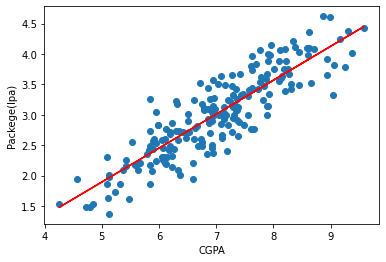

In [31]:
plt.scatter(X,Y)
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("CGPA")
plt.ylabel("Packege(lpa)")